# TP3 Mean Shift

Read, understand, and complete and run the following notebook. You must return the completed notebook, including your answers and illustrations (you may need to add cells to write your code or comments). 

Return your work by e-mail using a single file (ipynb or zip) with the format 'introvis18_tp2_yourname.ipynb'


## 0. Imports

In [2]:
import numpy as np 
# this is the key library for manipulating arrays. Use the online ressources! http://www.numpy.org/

import matplotlib.pyplot as plt 
# used to read images, display and plot http://matplotlib.org/api/pyplot_api.html . 
#You can also check this simple intro to using ipython notebook with images https://matplotlib.org/users/image_tutorial.html

%matplotlib inline 
# to display directly in the notebook

import scipy.ndimage as ndimage
# one of several python libraries for image procession

plt.rcParams['image.cmap'] = 'gray' 
# by default, the grayscale images are displayed with the jet colormap: use grayscale instead

from skimage.color import rgb2lab,lab2rgb
# for colorspace conversions

## 1. Mean shift

In this section, we will implement Mean Shift and test is on simple synthetic data (i.e. points you will sample from a probability distribution with known density - see below).

1: Generate a random vector of 100 2D points 'data1' with 50 points sampled from a Gaussian distribution of variance 1 centered in (0,0) and 50 points sampled from a Gaussian distribution of variance 1 centered in (2,1). Plot your points using the 'plt.scatter' function. This 'data' vector will be the synthetic data you will try to cluster, and for which the algorithm should manage to separate the point coming from each of the two Gaussians. Repeat to create a vector 'data2' with the center of the second Gaussian in (3,3). Which will be the easiest data vector to cluster? Test both in the following experiments.

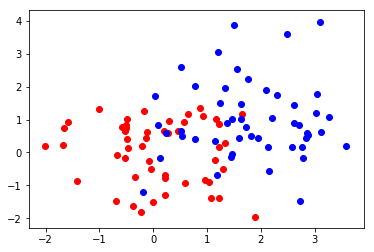

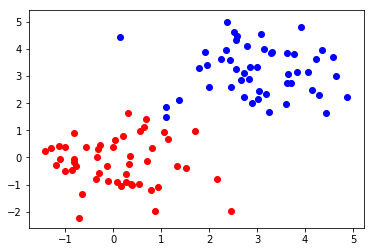

In [3]:
data1 = np.array([(np.random.normal(0, 1), np.random.normal(0, 1)) for i in range(50)] \
        + [(np.random.normal(2, 1), np.random.normal(1, 1)) for i in range(50)])

plt.scatter([x for x, y in data1[:50]], [y for x, y in data1[:50]], c='red')
plt.scatter([x for x, y in data1[50:]], [y for x, y in data1[50:]], c='blue')
plt.show()

data2 = np.array([(np.random.normal(0, 1), np.random.normal(0, 1)) for i in range(50)] \
        + [(np.random.normal(3, 1), np.random.normal(3, 1)) for i in range(50)])

plt.scatter([x for x, y in data2[:50]], [y for x, y in data2[:50]], c='red')
plt.scatter([x for x, y in data2[50:]], [y for x, y in data2[50:]], c='blue')
plt.show()

Clearly, data2 will be the easiest data vector to cluster.

2: We will segment images using a different distance parameter for space and color. For this reason, we will use a d dimensionnal vector 'sigma' as a parameter for all our mean-shift functions. It defines a scale for each dimension. What would be a meaningful parameter sigma for each of the synthetic data sets (data1 and data2)?

For our simple 2D points, we want that the x and y axis have as much as important each over. 

For the dataset 2 the clusters are easy to find.
Therefore we take $sigma = (1, 1)$.

For the dataset 1 we want to decrease sigma, in order to get mor clusters. Otherwise, all points will be in one unqiue cluster.
Therefore we take $sigma = (0.5, 0.5)$.

In [37]:
sigma2 = np.array([1, 1])
sigma1 = np.array([0.5, 0.5])

3: Implement the function MS_step which takes as input a vector of all the data point 'data', a starting point 'x' and the standard deviations 'sigma' and returns the updated position of the point 'x' after one step of the mean-shift algorithm. Test it on your synthetic data and visualize the result.

In [5]:
def MS_step(data, x, sigma):
    # Compute the mean shift vector 
    
    n, d = data.shape
    
    M_numerator = 0
    M_denominator = 0
    
    for i in range(n):
        g = (1 / 2) * np.exp((-1 / 2) * np.linalg.norm(x - data[i]) ** 2)
        
        M_numerator += data[i] * g
        M_denominator += g
    
    M = M_numerator / M_denominator if M_denominator != 0 else 0
    
    return M

4: Implement the function MS_point which iterates MS_step until convergence (e.g. the estimate changes by less than 0.01). Test it on your synthetic data and visualize the results.

In [6]:
def display_step(data, X):
    # Display one step with 
    # points from first gaussian in red
    # points from second gaussian in blue
    # point that is updeted in green
    
    plt.scatter([x for x, y in data[:50]], [y for x, y in data[:50]], c='red')
    plt.scatter([x for x, y in data[50:]], [y for x, y in data[50:]], c='blue')
    plt.scatter([X[0]], [X[1]])
    plt.show()

def MS_point(data, x, sigma, normalize=False, display_steps=False):
    data = data.copy()
    
    if normalize:
        n, d = data.shape
        #Normalisation des données par le vecteur sigma
        for i in range(n):
            data[i] /= sigma
    
    old_x = x
    
    convergence = False
    
    while not convergence:
        if display_steps:
            display_step(data, x)
        
        # Mise à jour du point
        x = MS_step(data, x, sigma)
        
        # Si le point est proche du point de l'itération précendante on arrête
        if np.linalg.norm(x - old_x) <= 0.01:
            convergence = True
        
        old_x = x
        
    return x

point generate from the first gaussian (red):


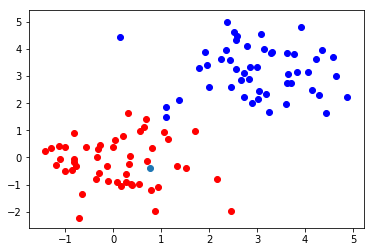

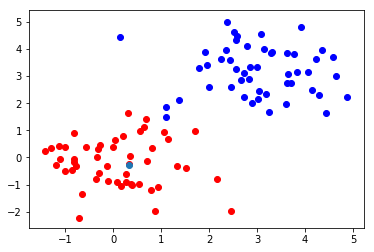

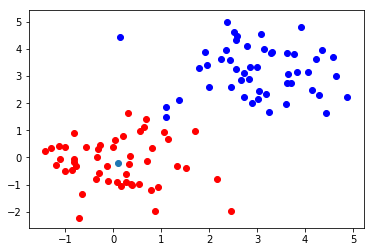

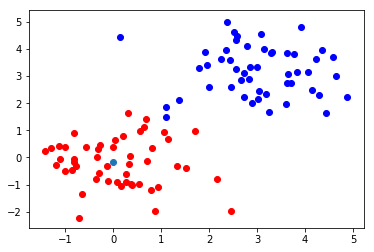

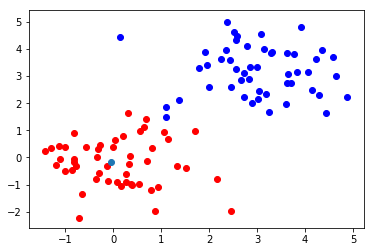

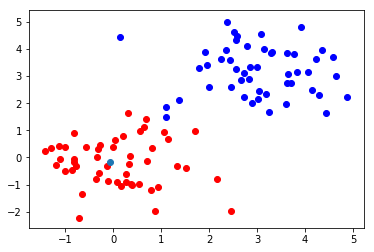

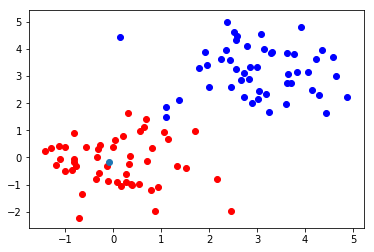

point generate from the second gaussian (blue):


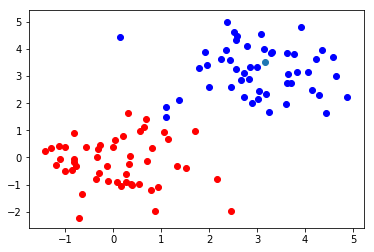

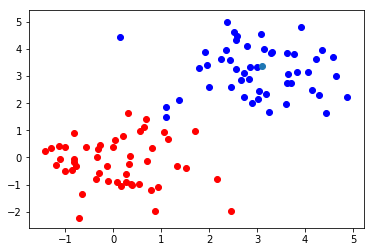

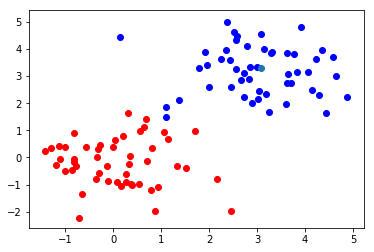

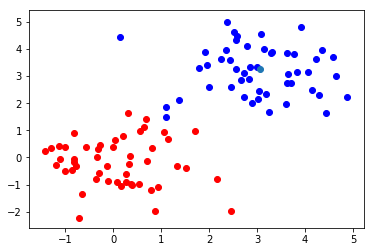

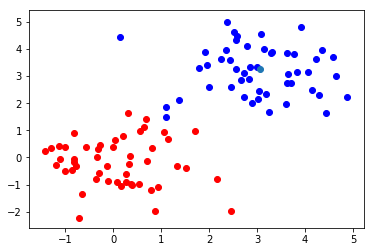

In [8]:
# Résultat pour le jeu de données 2:

# On génère deux point aléatoire provenant des deux distributions
rand_point_0 = np.array([np.random.normal(0, 1), np.random.normal(0, 1)]) / sigma2
rand_point_1 = np.array([np.random.normal(3, 1), np.random.normal(3, 1)]) / sigma2

print("point generate from the first gaussian (red):")
result_point0 = MS_point(data2, rand_point_0, sigma2, True, True)

print("point generate from the second gaussian (blue):")
result_point1 = MS_point(data2, rand_point_1, sigma2, True, True)

La classification avec le jeu de donnée 2 est facile, les deux points aléatoirement générés par les deux gausiennes convergent bien vers le bon cluster.  

point generate from the first gaussian (red):


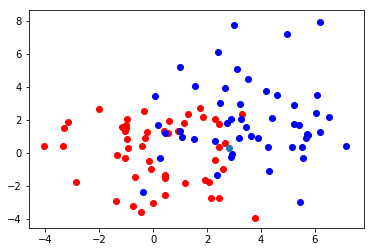

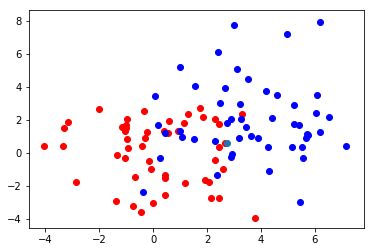

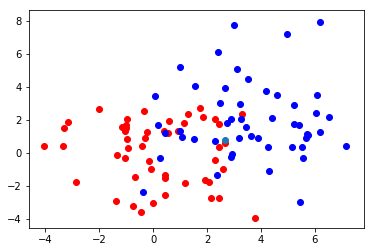

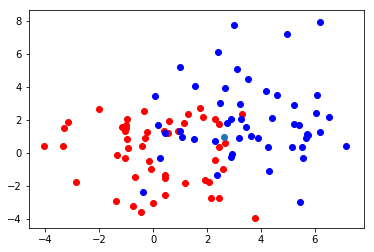

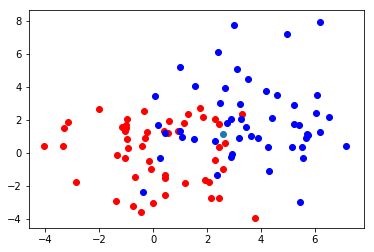

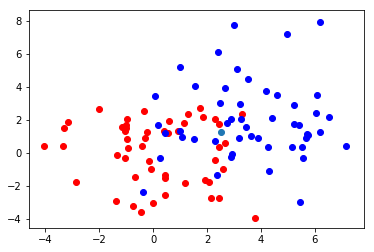

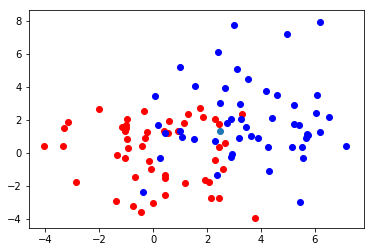

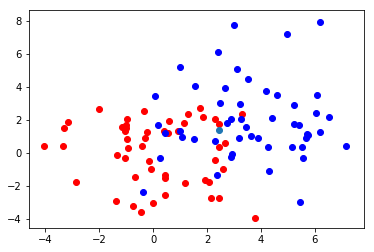

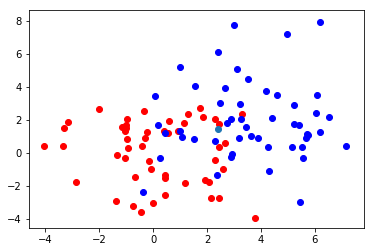

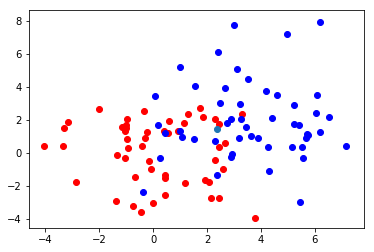

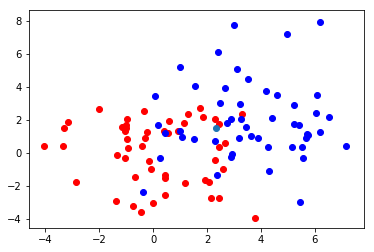

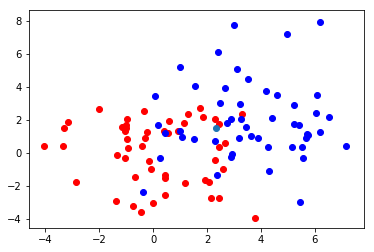

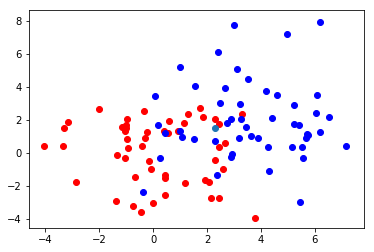

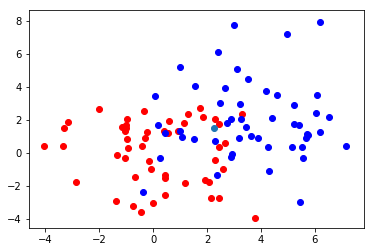

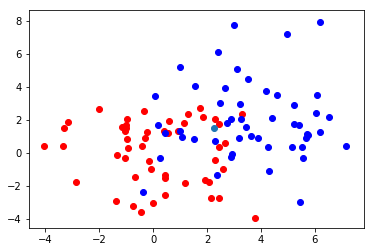

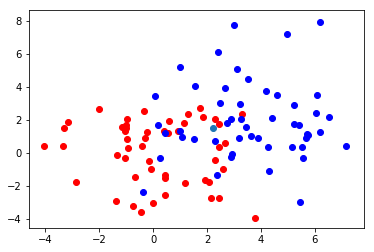

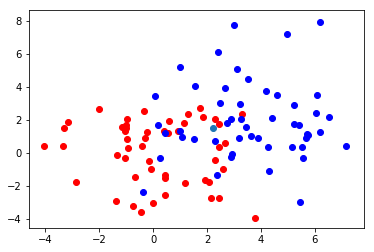

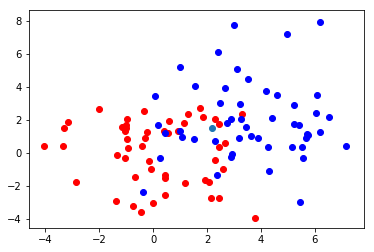

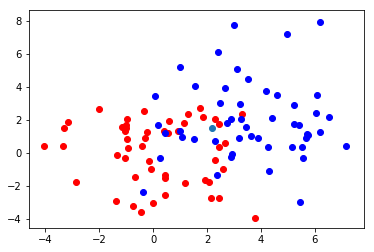

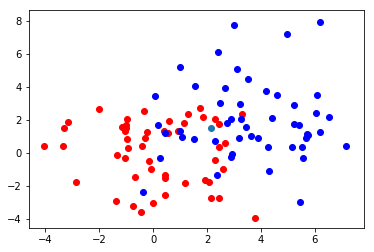

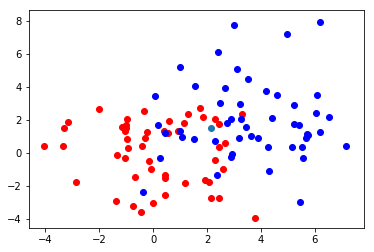

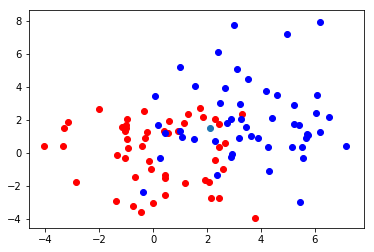

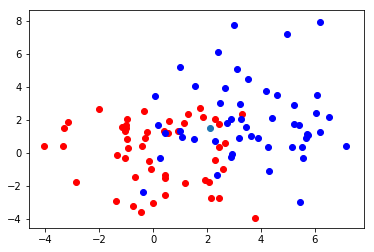

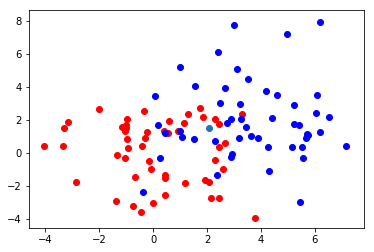

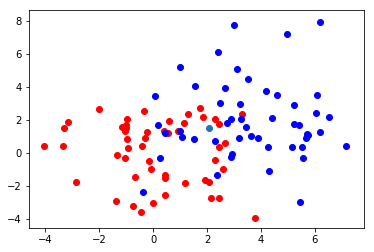

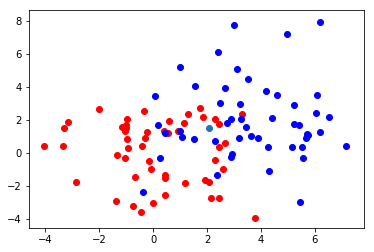

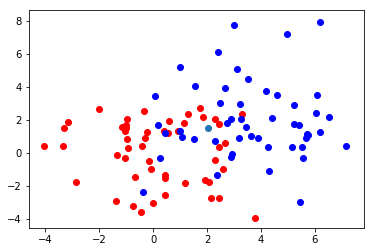

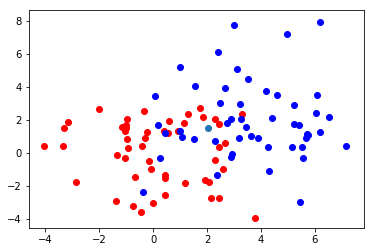

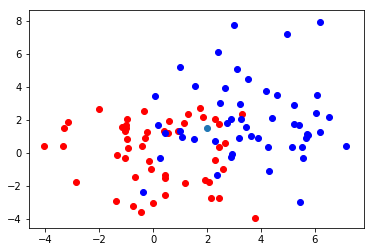

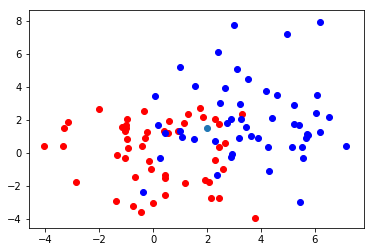

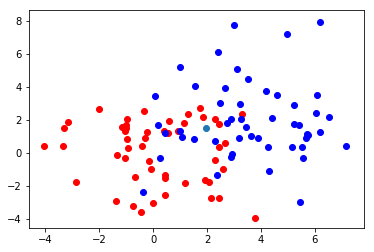

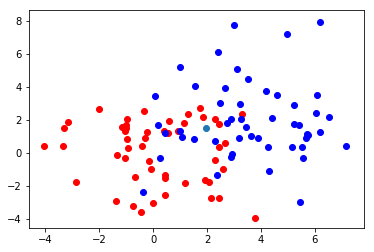

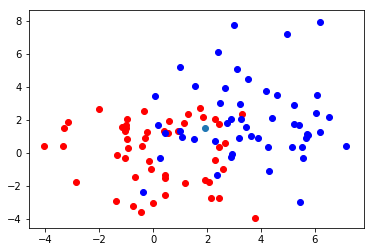

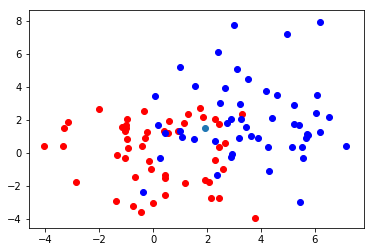

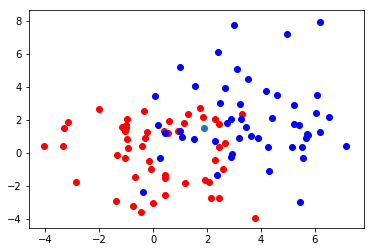

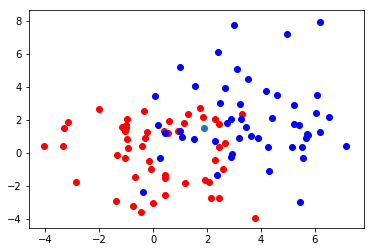

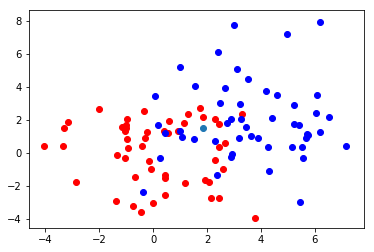

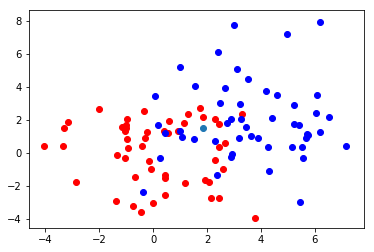

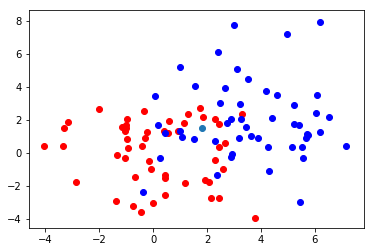

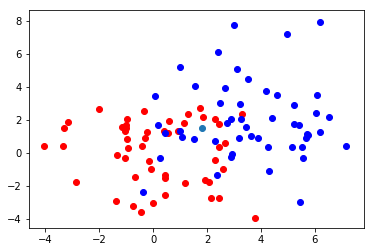

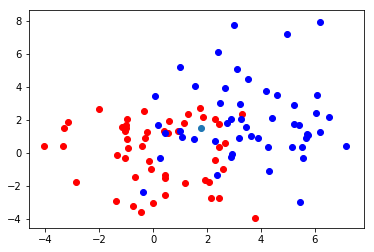

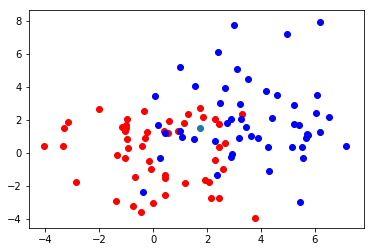

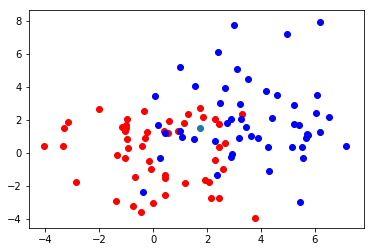

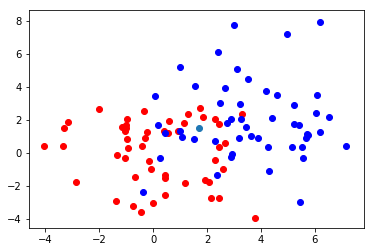

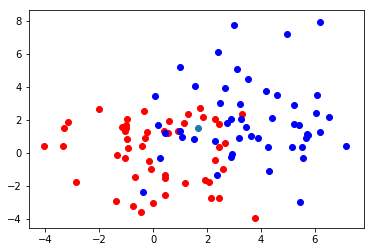

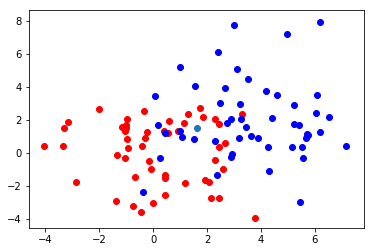

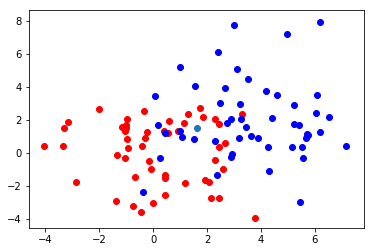

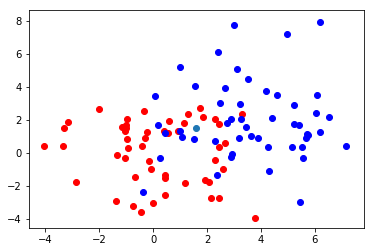

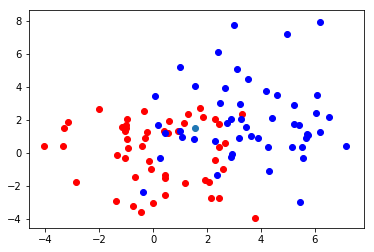

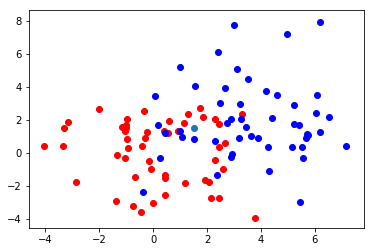

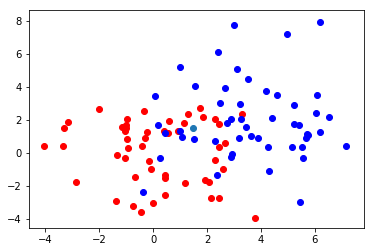

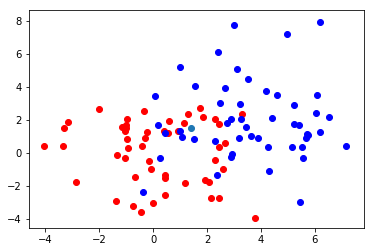

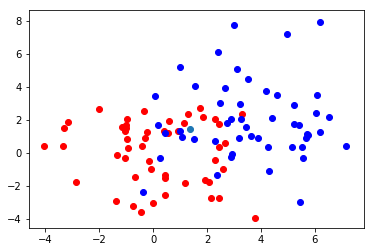

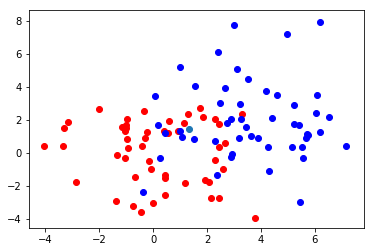

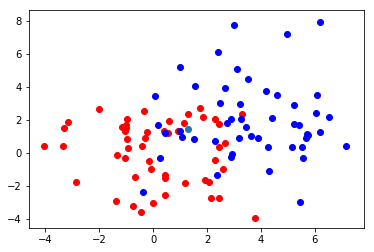

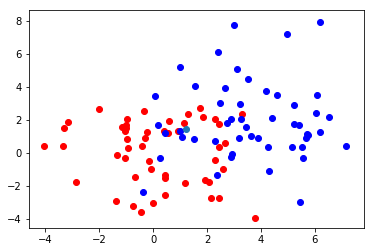

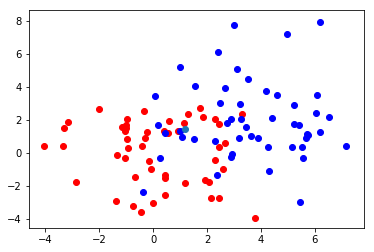

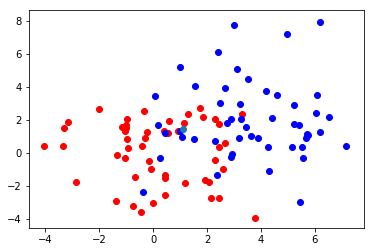

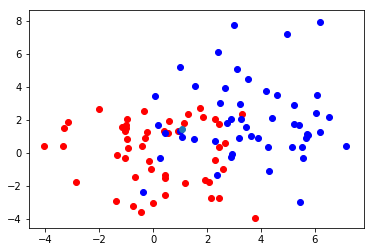

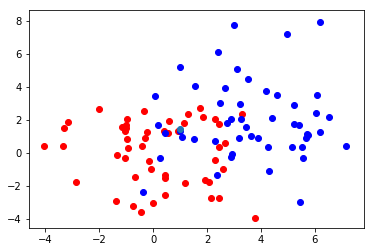

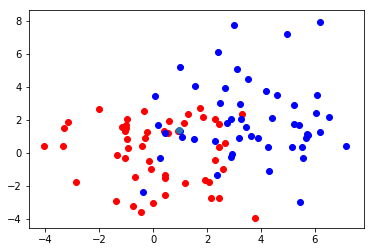

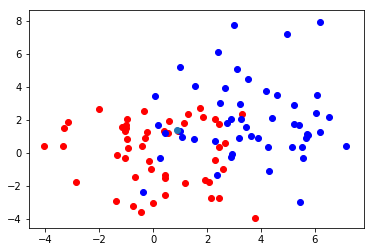

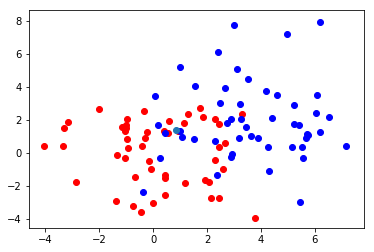

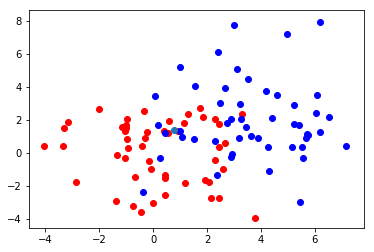

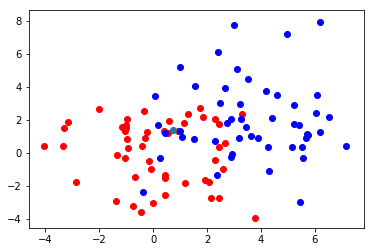

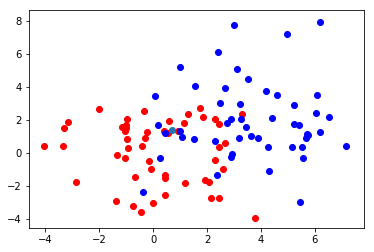

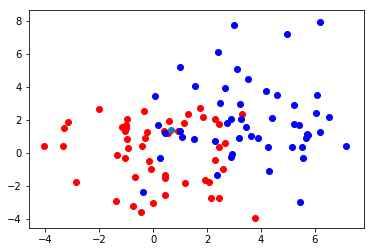

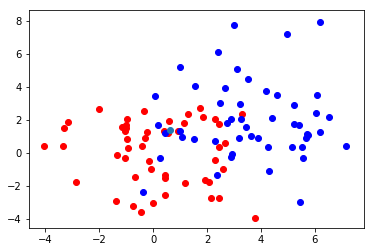

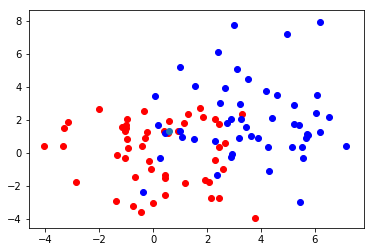

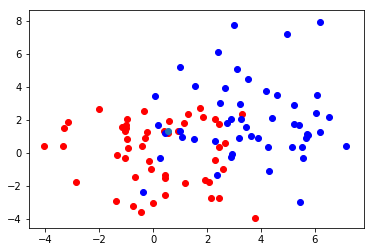

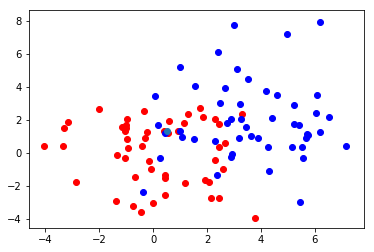

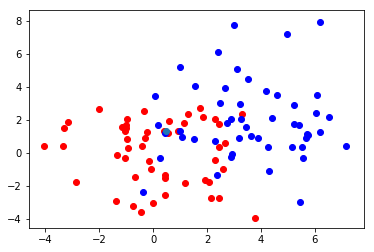

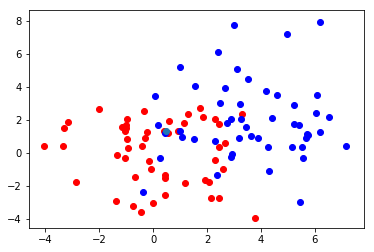

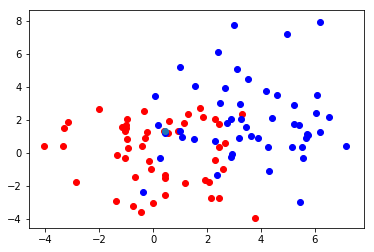

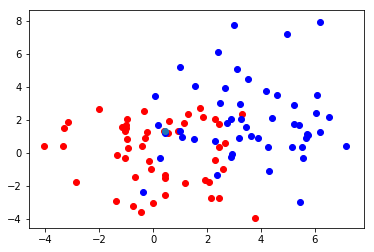

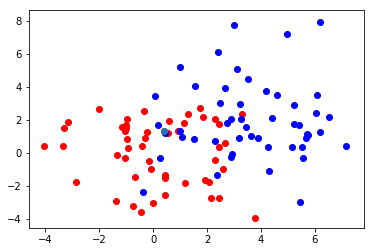

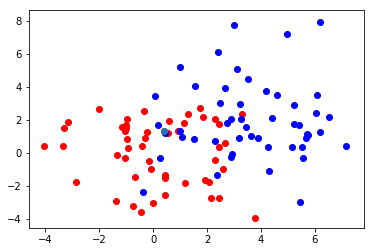

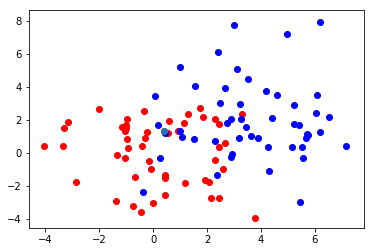

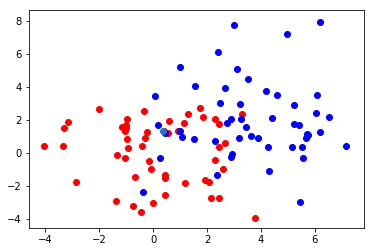

point generate from the second gaussian (blue):


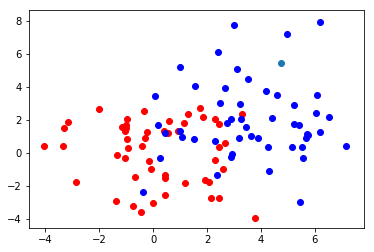

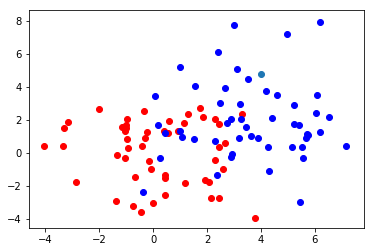

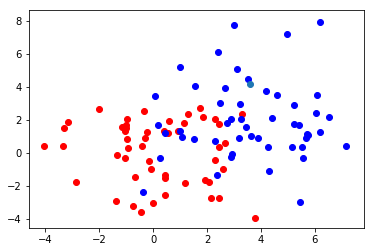

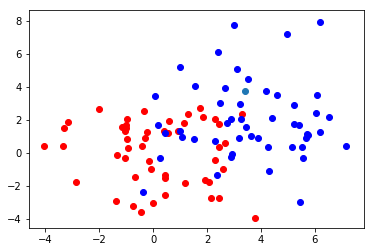

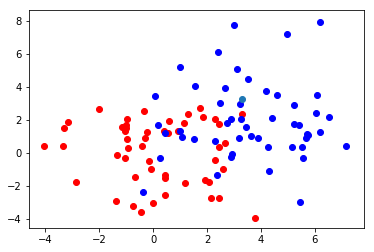

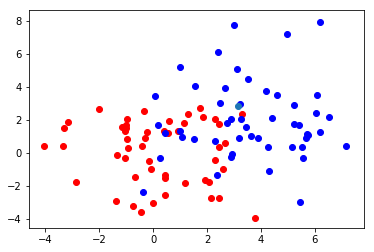

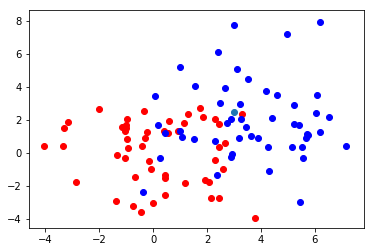

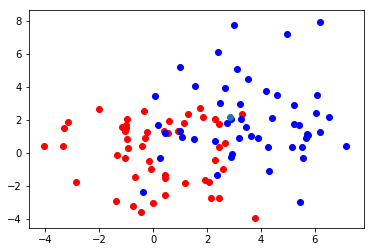

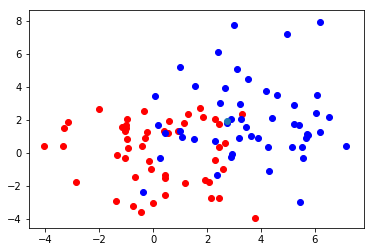

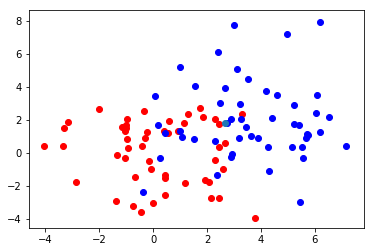

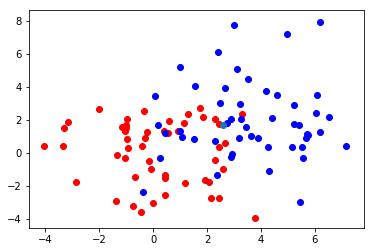

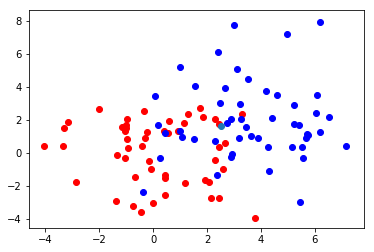

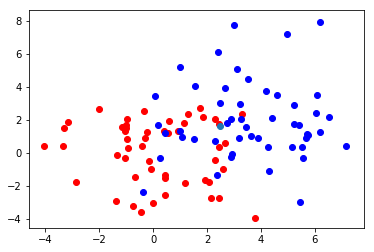

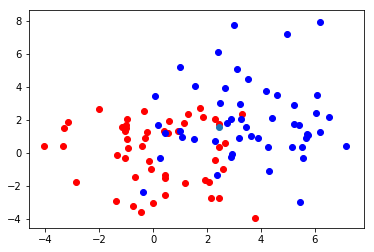

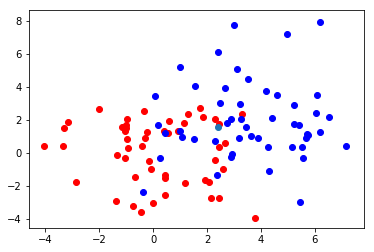

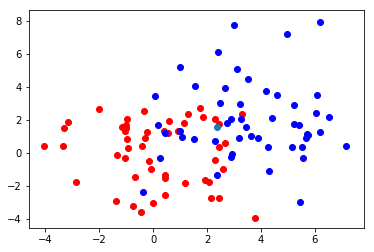

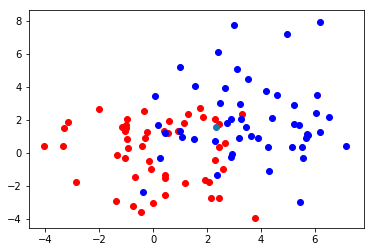

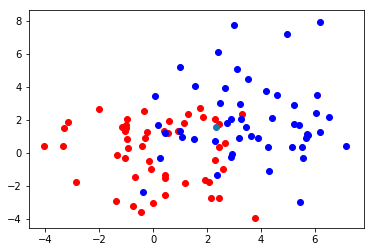

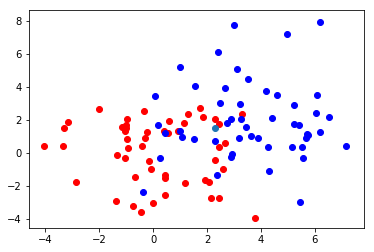

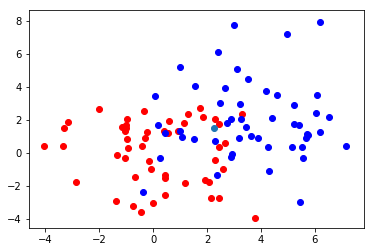

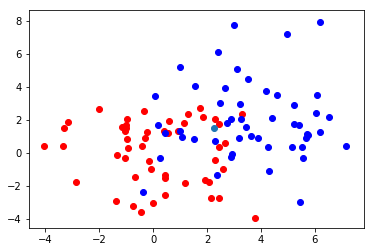

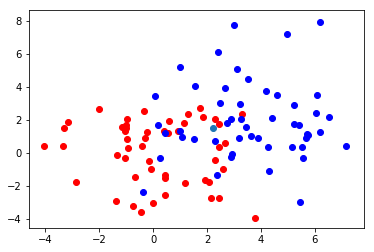

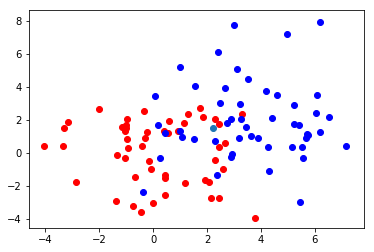

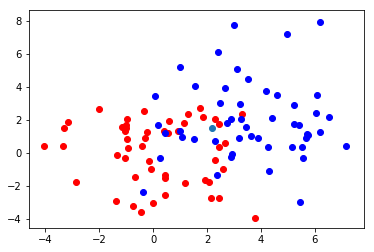

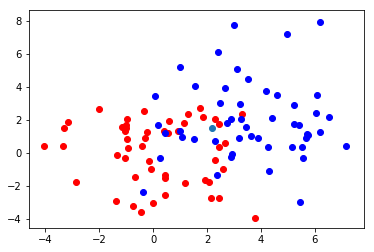

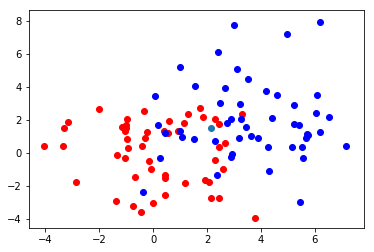

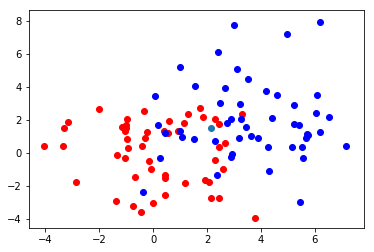

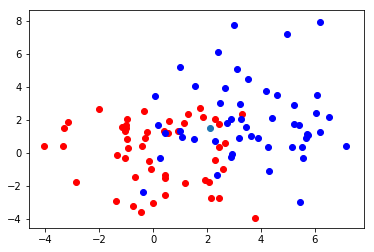

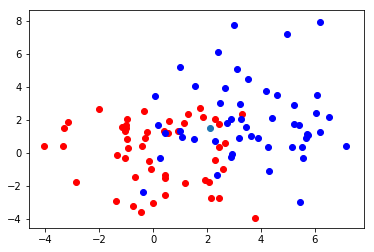

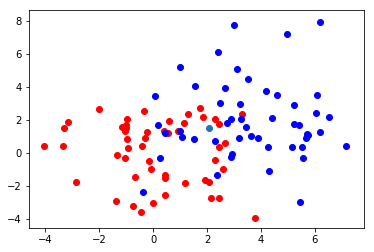

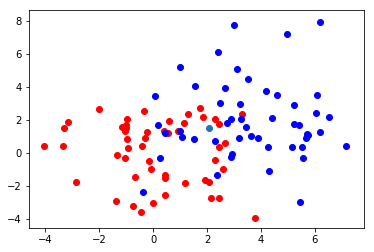

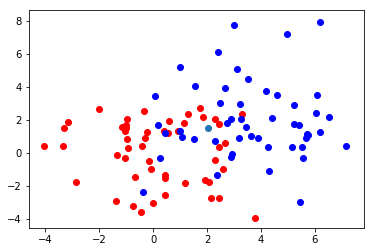

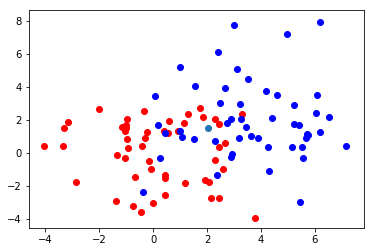

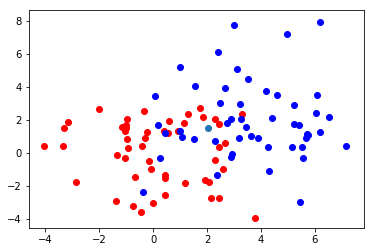

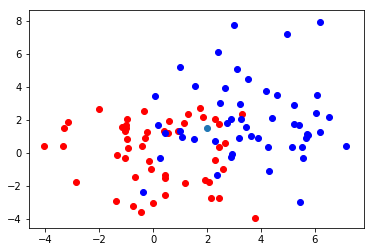

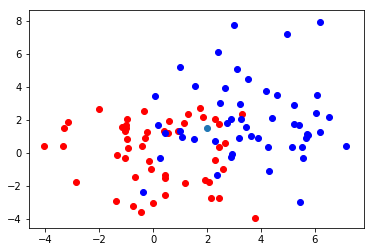

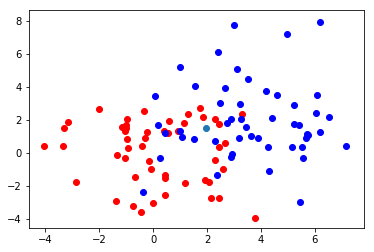

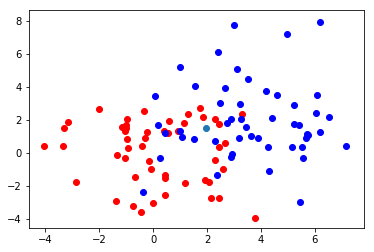

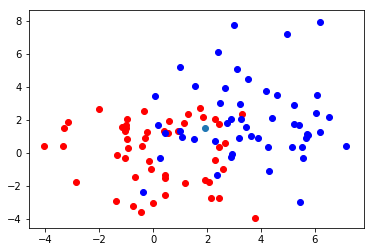

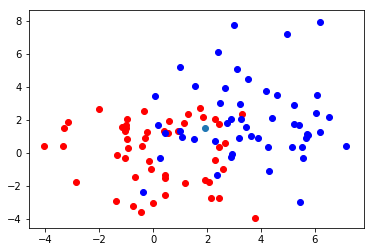

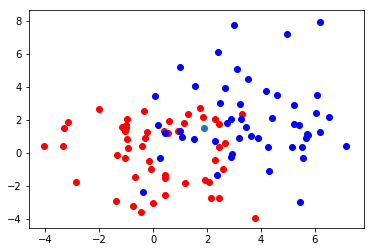

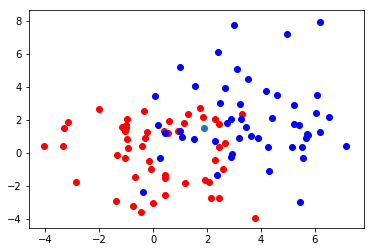

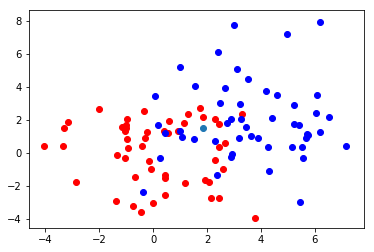

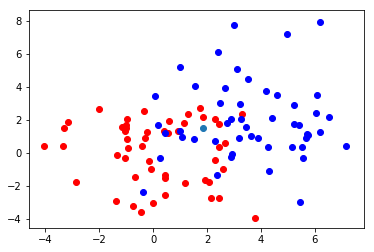

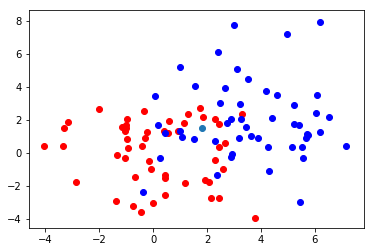

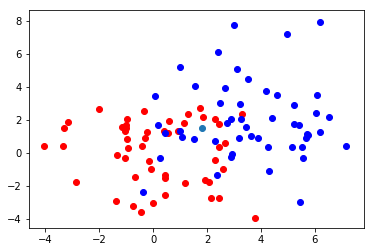

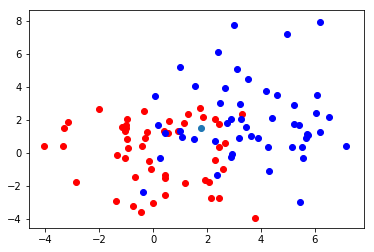

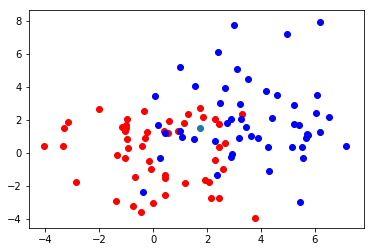

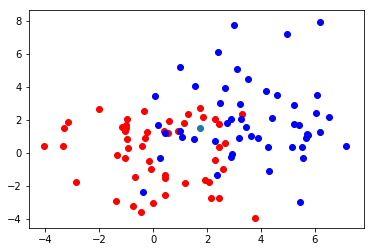

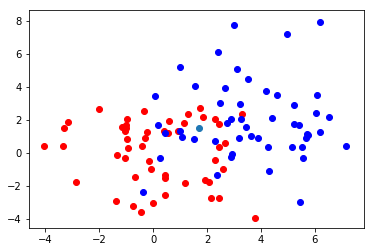

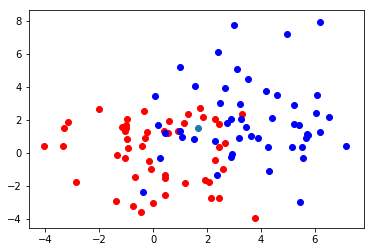

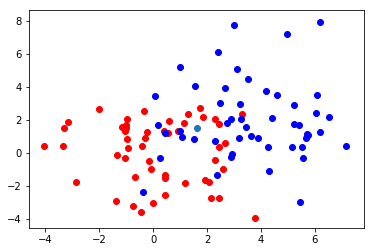

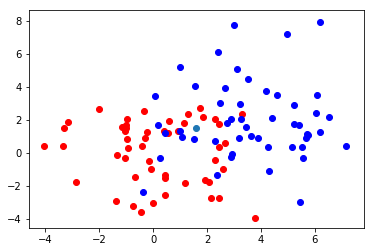

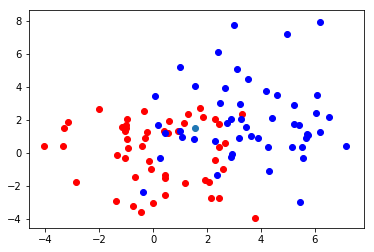

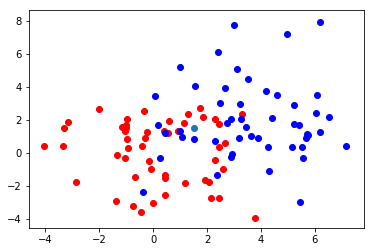

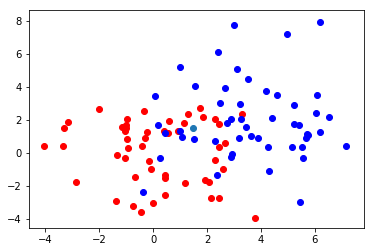

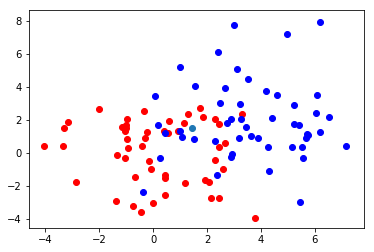

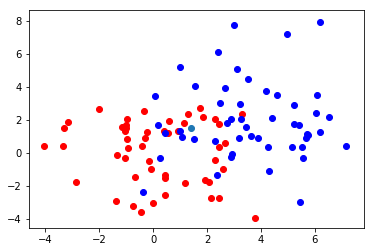

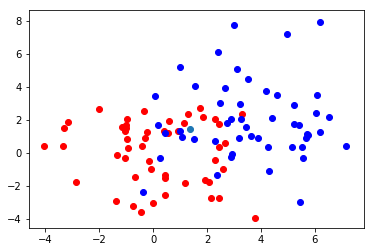

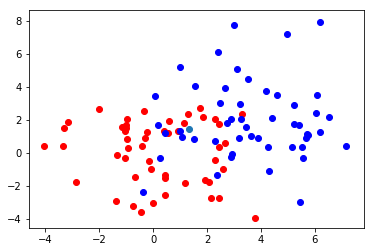

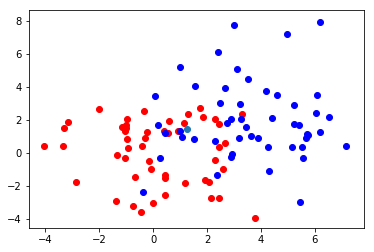

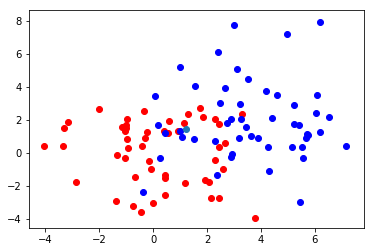

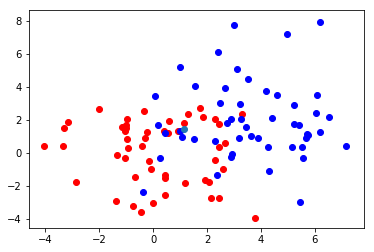

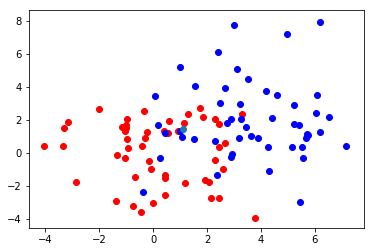

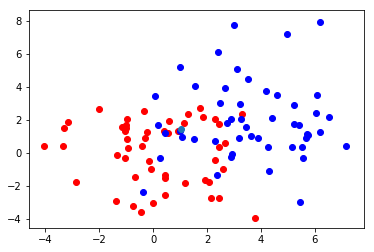

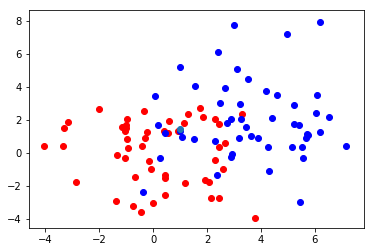

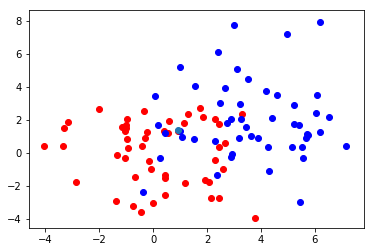

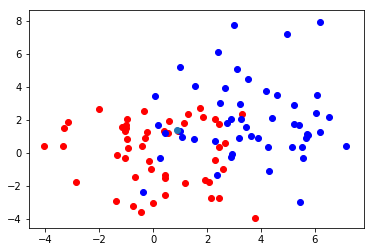

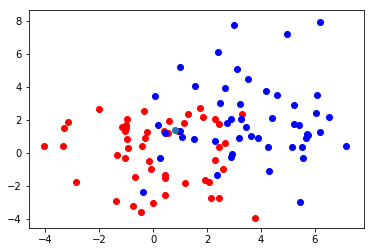

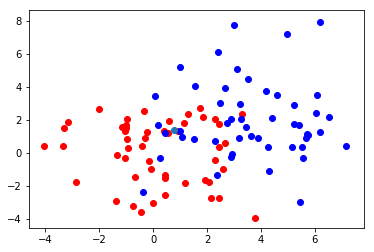

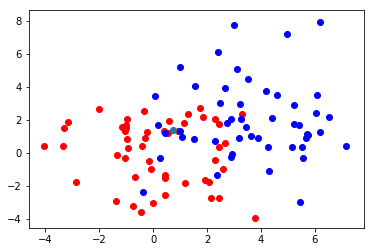

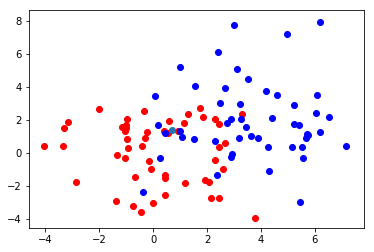

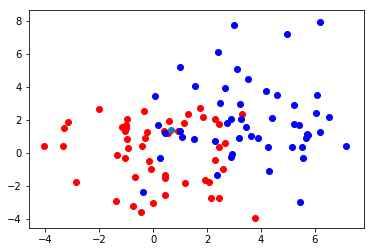

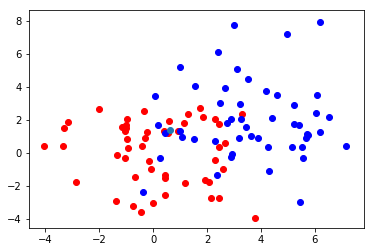

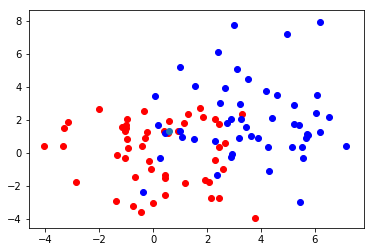

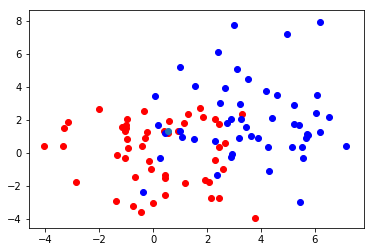

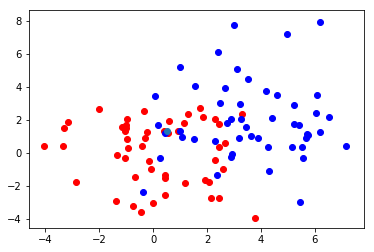

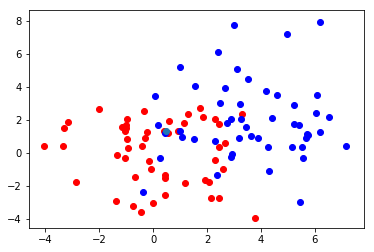

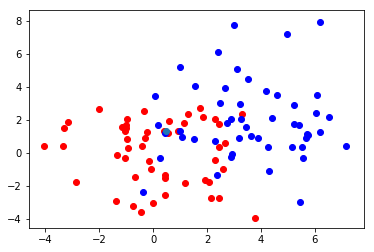

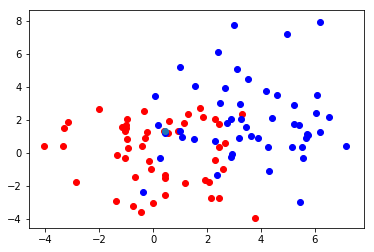

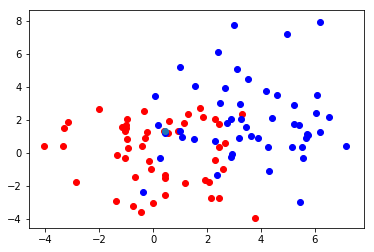

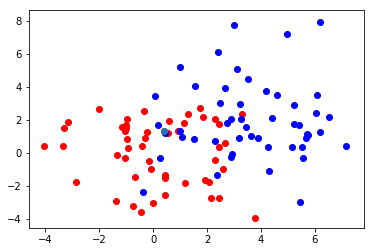

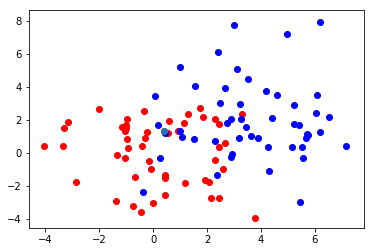

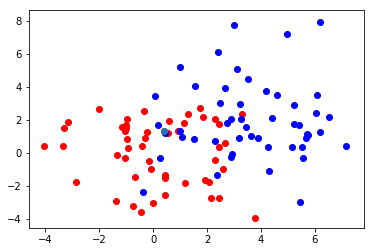

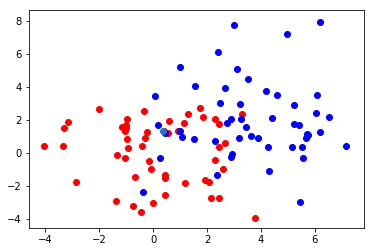

In [9]:
# Résultat pour le jeu de données 1

# On génère deux point aléatoire provenant des deux distributions
rand_point_0 = np.array([np.random.normal(0, 1), np.random.normal(0, 1)]) / sigma1
rand_point_1 = np.array([np.random.normal(2, 1), np.random.normal(1, 1)]) / sigma1

print("point generate from the first gaussian (red):")
result_point0 = MS_point(data1, rand_point_0, sigma1, True, True)

print("point generate from the second gaussian (blue):")
result_point1 = MS_point(data1, rand_point_1, sigma1, True, True)

On observe que la classification est plus difficile pour le jeu de donnée 1. En effet, les points convegent beaucoup plus lentement.

5: Implement the MS function, which implements the full mean shift algorithm by iterating MS_point on all the points, and merging modes which distance normalized by sigma -- sqrt[sum[((x-y)/sigma)**2) ]] -- is smaller than 0.5 . It must return a list of the modes and a label (corresponding to a mode) for each point.

In [ ]:
def display_result(data, labels, modes):
    # Affiche les points en 2D avec une couleur par cluster
    
    clusters = []
    for i in range(labels.shape[0]):
        clusters.append([])
    
    for i, x in enumerate(data):
        j = int(labels[i][0])
        clusters[j].append(x)
        
    colors = ['blue', 'red', 'green', 'yellow', 'black', 'grey']
        
    for i, cluster in enumerate(clusters):
        plt.scatter([x for x, y in cluster], [y for x, y in cluster], c=colors[i % len(colors)])
        
    plt.show()

def MS(data, sigma):
    data = data.copy()
    
    n, d = data.shape

    #Normalisation des données par le vecteur sigma
    for i in range(n):
        data[i] /= sigma

    labels = np.zeros([data.shape[0], 1])
    modes = []
    
    # Les nouveaux point calculés
    data_clustered = []
    
    for i, x in enumerate(data):
        
        # Calcul du point vers lequel le point x converge
        x_clustered = MS_point(data, x, sigma)
        
        data_clustered.append(x_clustered)
        
    # Dictionnaire qui à chaque mode associe la liste des
    # points appartenant à ce mode 
    mode_point = {}
    
    # Les mode sont numéroté par des indices
    mode_idx = 0
        
    for i, x in enumerate(data_clustered):
        
        # Vrai si le cluster du point est trouvé
        clustered = False
        
        for mode in range(mode_idx):
            
            belong_to_mode = True
            
            for y, _ in mode_point[mode]:
                if np.sqrt(((x - y) ** 2).sum()) > 0.5:
                    # Si le point x est trop loin de y, il n'appartient pas 
                    # au cluster de y
                    belong_to_mode = False
                    
            if belong_to_mode:
                # Ajout du point x au culster correspondant
                # i est l'indice du point x dans le vecteur de données
                mode_point[mode].append((x, i))
                clustered = True
                
        if not clustered:
            # Le point n'appartient à aucun cluster existant
            # Un nouveau cluster est crée
            
            modes.append(x)
            
            mode_point[mode_idx] = [(x, i)]
            
            mode_idx += 1
                
    for i, mode in enumerate(mode_point):
        points = mode_point[mode]
        
        # A chaque point x ont affecte sont label dans le vecteur label
        for x, idx in points:
            labels[idx] = i
            
    return labels, np.array(modes)

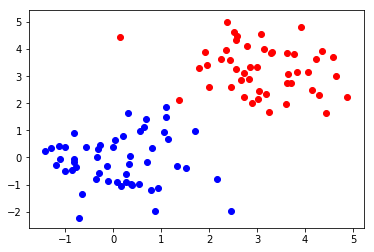

In [33]:
# Calcul des clusters pour le dataset 2

labels, modes = MS(data2, sigma2)

display_result(data2, labels, modes)

On affiche chaque cluster avec une couleur différente. Pour le jeu de donnée 2, il n'y a aucun problème.

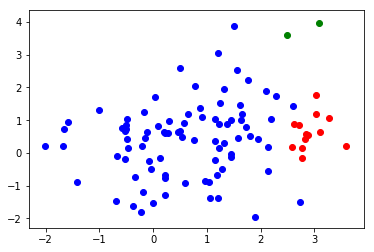

In [42]:
# Calcul des clusters pour le dataset 1

labels, modes = MS(data1, sigma1)

display_result(data1, labels, modes)

Pour le jeu de données 1 le résultat est moins convaincant.

## 2. Segmentation

1: Download [this small image](http://imagine.enpc.fr/~aubrym/lectures/introvis17/legumes_small.jpg), load it and convert it to the Lab colorspace. Why is it necessary to change colorspace? What are the range of the colorvalues in Lab? 

L'espace de couleur Lab représente de manière plus fine, la façon dont nous percevons les couleurs. En effet deux couleurs proches dans l'espace RGB peuvent nous paraître totalement différentes. A l'inverse nous percevons de la même façon certaines couleurs éloignées dans l'espace RGB.

C'est pourquoi il est nécaissaire pour la segmentation d'utiliser l'espace Lab.

Une couleur en Lab est compsée de 3 composantes. $0 \leq L \leq 100$ pour la luminance. les valeurs de $a$ et $b$ sont plus arbitraire mais dans la librairie que nous utilisons on a $-127 \leq a \leq 128$ et $-128 \leq b  \leq 127$.

In [13]:
image_path = 'legumes_small.jpg'

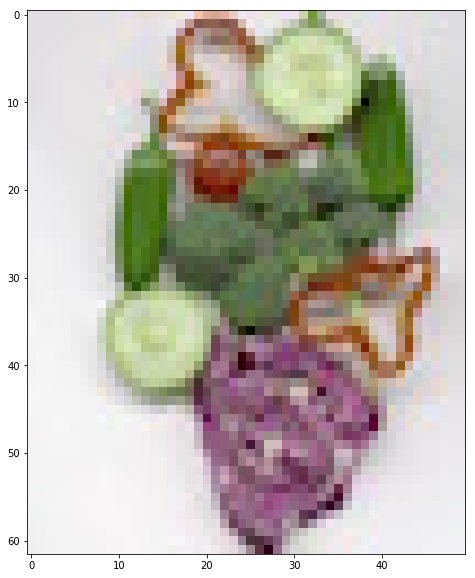

In [16]:
def show_img(I):
    plt.figure(figsize=(10,10)) # this line is not necessary, but allows you to control the size of the displayed image
    plt.imshow(I)

I_rgb = plt.imread(image_path)
show_img(I_rgb)

I = rgb2lab(I_rgb)

2: In Mean Shift segmentation, all pixels in the image will be treated as data points including both their color and position in the image. Convert the (N,M,3) image into an (NM,5) array incuding color and position information for each point. What would be a meaningful value for sigma?

Tip: use the np.meshgrid function

In [34]:
print('Dimension de l\'image avant conversion: (N, M, 3) =', I.shape)

N, M, _ = I.shape
I_array = I.reshape(N * M, 3)

I_array = I_array.tolist()

for i in range(N):
    for j in range(M):
        A = [i, j]
        c = A + I_array[i * M + j]
        I_array[i * M + j] = c

I_array = np.array(I_array)

print('Dimension de l\'image après conversion: (NM, 5) =', I_array.shape)

Dimension de l'image avant conversion: (N, M, 3) = (62, 50, 3)
Dimension de l'image après conversion: (NM, 5) = (3100, 5)


Ici sigma est un vecteur de dimension 5. Les deux premières coordonnées sont pour la position d'un pixel, les trois dernières sont les composante L, a, b du pixel.

3: Use the MS function from the previous section to compute a meaningful segmentation of the image. Visualize the results as an image by replacing the color values of the pixels associated to each mode by the color of the mode.

In [40]:
sigma = np.array([4, 3, 10, 12, 12])

labels_img, modes_img = MS(I_array, sigma)

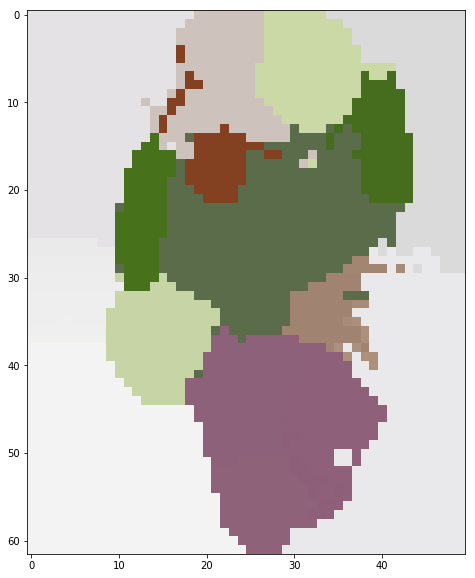

In [41]:
def display_image_result(I, I_array, labels, modes):
    I_result = I.copy()
    
    for i, pix in enumerate(I_array):
        x, y = int(pix[0]), int(pix[1])
        
        # Complete the final image
        # Renormalize by sigma in order to get the right colors
        I_result[x, y] = modes[int(labels[i])][2:] * sigma[2:]
    
    # Reconvert the image in RGB
    I_rgb = lab2rgb(I_result)
    
    # Display the rgb image
    show_img(I_rgb)
    
display_image_result(I, I_array, labels_img, modes_img)